# A. Basics of Linear Algebra to Solve Systems of Equations

**Goals**
- Understand how to represent a linear system in matrix form $A\mathbf{x}=\mathbf{b}$.
- Diagnose when a system has a unique solution, infinitely many solutions, or no solution.
- Use NumPy to compute ranks, determinants, and solve or analyze systems.
- See geometric intuition in 2D (lines) and learn core algorithms (Gaussian elimination).

In [1]:
# Add this to your cells to import commonly used libraries
import numpy as np
from numpy.linalg import matrix_rank, det, solve, lstsq, inv
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=4)

### 1. Linear systems and matrix form
A linear system with unknown vector $\mathbf{x} \in \mathbb{R}^n$ can be written as $A\mathbf{x} = \mathbf{b},$ where $A \in \mathbb{R}^{m\times n}$ is the coefficient matrix and $\mathbf{b} \in \mathbb{R}^m$.

**Augmented matrix**: $[A\mid \mathbf{b}]$ is useful for row-reduction (Gaussian elimination).

In this example below, we have two equations: 
x + y + z = 3 & 2x -y -3z = 0

In [2]:
# Add comments yourself!!!
# A small example system
import numpy as np
A = np.array([[1., 1., 1.], [2., -1., -3]])
b = np.array([3., 0.])#[:, None]
print('A =\n', A)
print('b =\n', b)
aug = np.c_[A, b]  # Syntax to create augmented matrix [A|b]
print('Augmented [A|b] =\n', aug)

A =
 [[ 1.  1.  1.]
 [ 2. -1. -3.]]
b =
 [3. 0.]
Augmented [A|b] =
 [[ 1.  1.  1.  3.]
 [ 2. -1. -3.  0.]]


### 2. Types of solutions and rank conditions
Let $r = \operatorname{rank}(A)$ and $r_a = \operatorname{rank}([A\mid \mathbf{b}])$.
- **Unique solution**: $r = r_a = n$.
- **Infinitely many solutions**: $r = r_a < n$.
- **No solution** (inconsistent): $r \neq r_a$.

For a square system ($m=n$): $\det(A) \neq 0$ $\Rightarrow$ unique solution; if $\det(A)=0$, then either infinitely many or none (check consistency).

#### 2.1 Unique solution example
We have two equations in the example below: x + y = 3 & 2x - y = 0. That's why we have a unique solution.

In [3]:
A1 = np.array([[1., 1.], [2., -1.]])
b1 = np.array([3., 0.])
rA1 = matrix_rank(A1)
rAug1 = matrix_rank(np.c_[A1, b1])
print('rank(A)=', rA1, ' rank([A|b])=', rAug1)
print('det(A)=', det(A1))

rank(A)= 2  rank([A|b])= 2
det(A)= -2.9999999999999996


Exercise- 
Plot these two functions in the same plot

[ 7.      6.8367  6.6735  6.5102  6.3469  6.1837  6.0204  5.8571  5.6939
  5.5306  5.3673  5.2041  5.0408  4.8776  4.7143  4.551   4.3878  4.2245
  4.0612  3.898   3.7347  3.5714  3.4082  3.2449  3.0816  2.9184  2.7551
  2.5918  2.4286  2.2653  2.102   1.9388  1.7755  1.6122  1.449   1.2857
  1.1224  0.9592  0.7959  0.6327  0.4694  0.3061  0.1429 -0.0204 -0.1837
 -0.3469 -0.5102 -0.6735 -0.8367 -1.    ] [-8.     -7.6735 -7.3469 -7.0204 -6.6939 -6.3673 -6.0408 -5.7143 -5.3878
 -5.0612 -4.7347 -4.4082 -4.0816 -3.7551 -3.4286 -3.102  -2.7755 -2.449
 -2.1224 -1.7959 -1.4694 -1.1429 -0.8163 -0.4898 -0.1633  0.1633  0.4898
  0.8163  1.1429  1.4694  1.7959  2.1224  2.449   2.7755  3.102   3.4286
  3.7551  4.0816  4.4082  4.7347  5.0612  5.3878  5.7143  6.0408  6.3673
  6.6939  7.0204  7.3469  7.6735  8.    ]


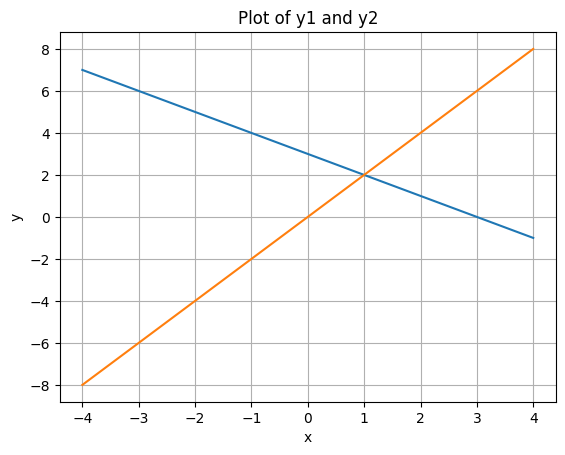

In [33]:
import numpy as np
from numpy.linalg import matrix_rank, det, solve, lstsq, inv
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=4)

y1=3-x
y2=2*x

plt.plot(x,y1)
plt.plot(x,y2)

print(y1,y2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y1 and y2")
plt.grid(True) 

#### 2.2 Infinitely many solutions example
In this example, the second equation is a multiple of the first.

In [5]:
A2 = np.array([[1., 1.], [2., 2.]])
b2 = np.array([2., 4.])
rA2 = matrix_rank(A2)
rAug2 = matrix_rank(np.c_[A2, b2])
print('rank(A)=', rA2, ' rank([A|b])=', rAug2)
print('det(A)=', det(A2))

rank(A)= 1  rank([A|b])= 1
det(A)= 0.0


Exercise- 

Plot there two functions together in one plot: x + y = 2 & 2x + 2y = 4

[12.     11.798  11.596  11.3939 11.1919 10.9899 10.7879 10.5859 10.3838
 10.1818  9.9798  9.7778  9.5758  9.3737  9.1717  8.9697  8.7677  8.5657
  8.3636  8.1616  7.9596  7.7576  7.5556  7.3535  7.1515  6.9495  6.7475
  6.5455  6.3434  6.1414  5.9394  5.7374  5.5354  5.3333  5.1313  4.9293
  4.7273  4.5253  4.3232  4.1212  3.9192  3.7172  3.5152  3.3131  3.1111
  2.9091  2.7071  2.5051  2.303   2.101   1.899   1.697   1.4949  1.2929
  1.0909  0.8889  0.6869  0.4848  0.2828  0.0808 -0.1212 -0.3232 -0.5253
 -0.7273 -0.9293 -1.1313 -1.3333 -1.5354 -1.7374 -1.9394 -2.1414 -2.3434
 -2.5455 -2.7475 -2.9495 -3.1515 -3.3535 -3.5556 -3.7576 -3.9596 -4.1616
 -4.3636 -4.5657 -4.7677 -4.9697 -5.1717 -5.3737 -5.5758 -5.7778 -5.9798
 -6.1818 -6.3838 -6.5859 -6.7879 -6.9899 -7.1919 -7.3939 -7.596  -7.798
 -8.    ] [ 24.      23.596   23.1919  22.7879  22.3838  21.9798  21.5758  21.1717
  20.7677  20.3636  19.9596  19.5556  19.1515  18.7475  18.3434  17.9394
  17.5354  17.1313  16.7273  16.3232  15.9

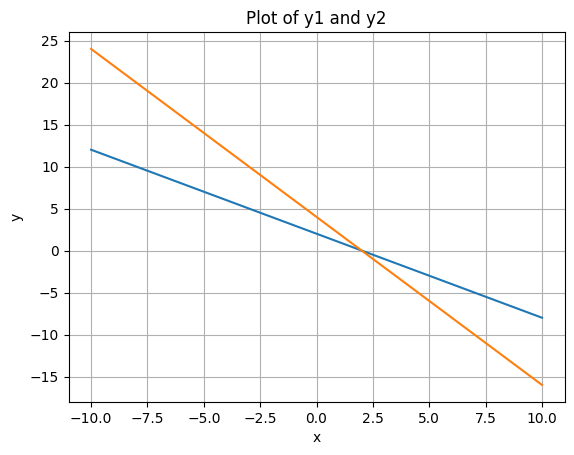

In [36]:
# Your code here
import numpy as np
from numpy.linalg import matrix_rank, det, solve, lstsq, inv
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=4)

x=np.linspace(-10,10,100)

y1=2-x
y2=4-2*x

plt.plot(x,y1)
plt.plot(x,y2)

print(y1,y2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y1 and y2")
plt.grid(True) 

#### 2.3 No solution example
Parallel lines (inconsistent).

In [7]:
A3 = np.array([[1., 1.], [2., 2.]])
b3 = np.array([2., 5.])
rA3 = matrix_rank(A3)
rAug3 = matrix_rank(np.c_[A3, b3])
print('rank(A)=', rA3, ' rank([A|b])=', rAug3, ' => inconsistent')
print('det(A)=', det(A3))


rank(A)= 1  rank([A|b])= 2  => inconsistent
det(A)= 0.0


Exercise-

Plot these two functions toghether in one plot: x + y = 2 & 2x + 2y = 5

[12.     11.798  11.596  11.3939 11.1919 10.9899 10.7879 10.5859 10.3838
 10.1818  9.9798  9.7778  9.5758  9.3737  9.1717  8.9697  8.7677  8.5657
  8.3636  8.1616  7.9596  7.7576  7.5556  7.3535  7.1515  6.9495  6.7475
  6.5455  6.3434  6.1414  5.9394  5.7374  5.5354  5.3333  5.1313  4.9293
  4.7273  4.5253  4.3232  4.1212  3.9192  3.7172  3.5152  3.3131  3.1111
  2.9091  2.7071  2.5051  2.303   2.101   1.899   1.697   1.4949  1.2929
  1.0909  0.8889  0.6869  0.4848  0.2828  0.0808 -0.1212 -0.3232 -0.5253
 -0.7273 -0.9293 -1.1313 -1.3333 -1.5354 -1.7374 -1.9394 -2.1414 -2.3434
 -2.5455 -2.7475 -2.9495 -3.1515 -3.3535 -3.5556 -3.7576 -3.9596 -4.1616
 -4.3636 -4.5657 -4.7677 -4.9697 -5.1717 -5.3737 -5.5758 -5.7778 -5.9798
 -6.1818 -6.3838 -6.5859 -6.7879 -6.9899 -7.1919 -7.3939 -7.596  -7.798
 -8.    ] [12.5    12.298  12.096  11.8939 11.6919 11.4899 11.2879 11.0859 10.8838
 10.6818 10.4798 10.2778 10.0758  9.8737  9.6717  9.4697  9.2677  9.0657
  8.8636  8.6616  8.4596  8.2576  8.0556  

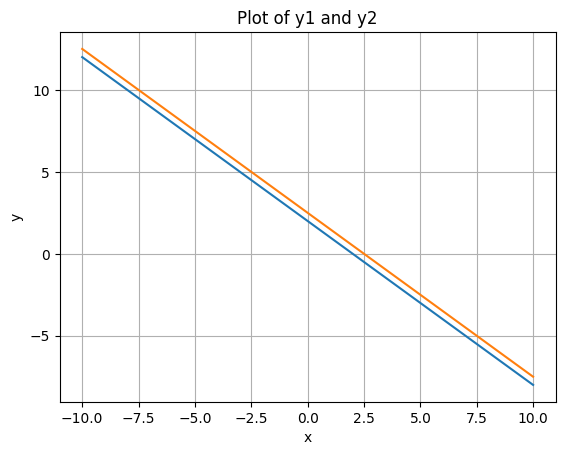

In [37]:
# Your code here
import numpy as np
from numpy.linalg import matrix_rank, det, solve, lstsq, inv
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=4)

x=np.linspace(-10,10,100)

y1=2-x
y2=(5-2*x)/2

plt.plot(x,y1)
plt.plot(x,y2)

print(y1,y2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y1 and y2")
plt.grid(True) 

# B. Solving Systems of Linear Equations with Python
We will explore various methods for solving systems of linear equations using Python. We will cover

1. Solving systems using `numpy.linalg.solve` and matrix inversion
2. Gauss Elimination
3. Iterative methods like Gauss-Seidel
4. Least squares method

## 1. Types of Solutions to Linear Systems
- Unique solution
- Infinite solutions
- No solution
- Geometric interpretation
- Role of rank and determinant

### Geometric interpretation in 2D
- Unique solution: two lines intersect at one point.
- Infinite solutions: coincident lines.
- No solution: parallel, distinct lines.

## 2. Direct Methods
### a. Using `np.linalg.solve`
When 1.)The coefficient matrix A is square (same number of equations as unknowns). 2.) The matrix A is full rank (i.e., its determinant is non-zero).

Don't use when 1.) The matrix is not square. 2.)The matrix is singular (determinant is zero). 3.)The system has no solution or infinitely many solutions.

In [9]:
import numpy as np
A = np.array([[2, 1], [1, 3]])
b = np.array([8, 13])
print("A=", A)
print("b=", b)
print("Augmented Matrix [A|b] =\n", np.c_[A, b])
print('rank(A)=', matrix_rank(A), ' rank([A|b])=', matrix_rank(np.c_[A, b]))
print('det(A)=', det(A))
x = np.linalg.solve(A, b)
print("Solution:\n", x)

A= [[2 1]
 [1 3]]
b= [ 8 13]
Augmented Matrix [A|b] =
 [[ 2  1  8]
 [ 1  3 13]]
rank(A)= 2  rank([A|b])= 2
det(A)= 5.000000000000001
Solution:
 [2.2 3.6]


### b. Matrix Inversion
Determinant and invertibility (square systems)
If $\det(A) \neq 0$, then $A$ is invertible and the unique solution is $\mathbf{x}=A^{-1}\mathbf{b}$. If $\det(A)=0$, the system is either inconsistent or has infinitely many solutions.

In [10]:
A = np.array([[2, 1], [1, 3]])
b = np.array([8, 13])
print('det(A)=', det(A))

# Solve using inversion (A is square and invertible here) and show result
x = np.linalg.inv(A) @ b
print("Solution via inversion:", x)

det(A)= 5.000000000000001
Solution via inversion: [2.2 3.6]


## 3. Gaussian Elimination
Manual row operations to echelon form and back-substitution.
Below is a simple implementation with partial pivoting to reach (upper) row-echelon form and solve when a unique solution exists.

### Example-
Let's solve this system of equation:

2x + y - z = 8 

-3x - y + 2z = -11

-2x + y + 2z = -3


In [11]:
# Your code here for Gaussian elimination step by step
# Print out the augmented matrix at each step

import numpy as np
A = np.array([[2., 1., -1.], 
              [3., 3., 9.], 
              [3., 4., 2.]])
b = np.array([8., 0., -5.])

# Step 1: Initial Augmented Matrix

# Step 2: Make pivot A[0][0] = 1

# Step 3: Eliminate A[1][0] using row 0

# Step 4: Eliminate A[2][0] using row 0
 
# Step 5: Make pivot A[1][1] = 1

# Step 6: Eliminate A[2][1] using row 1

# Step 7: Make pivot A[2][2] = 1

# Step 8: Back substitution to get final solution

Exercise-

Use loops to do the foward elimination (i.e., make pivot and eliminate) and the back substitution for Gaussian Elimination. Draw a flow chart first. 

In [12]:
# Your code here

## 4. Iterative Method- Gauss-Seidel 

 This method solves a system of linear equations iteratively and prints the updated solution vector at each iteration until convergence.

Example-

Let's solve this system of equation:

4x_0 - x_1         = 15 

-x_0 - 4x_1 - x_2  = 10
     
     - x_1  + 3x_2 = 10


In [13]:
import numpy as np

# Define the system of equations
A = np.array([[4.0, -1.0, 0.0],
              [-1.0, 4.0, -1.0],
              [0.0, -1.0, 3.0]])
b = np.array([15.0, 10.0, 10.0])

# Initial guess
x = np.zeros_like(b)

# Tolerance and maximum iterations
tol = 1e-6
max_iterations = 25

n = len(b)
print ("length of b array=", n)

print("Initial guess:", x)

for k in range(max_iterations):
    x_new = np.copy(x)
    print(f"Iteration {k+1}:")
    for i in range(n):
        s1 = sum(A[i][j] * x_new[j] for j in range(i))
        s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
        x_new[i] = (b[i] - s1 - s2) / A[i][i]
        print(f"x[{i}] = {x_new[i]}")

    # Check for convergence
    if np.allclose(x, x_new, atol=tol):
        print("Converged!")
        break
    x = x_new

print("Final solution:")
print(x)


length of b array= 3
Initial guess: [0. 0. 0.]
Iteration 1:
x[0] = 3.75
x[1] = 3.4375
x[2] = 4.479166666666667
Iteration 2:
x[0] = 4.609375
x[1] = 4.772135416666667
x[2] = 4.924045138888889
Iteration 3:
x[0] = 4.943033854166667
x[1] = 4.966769748263889
x[2] = 4.988923249421297
Iteration 4:
x[0] = 4.991692437065972
x[1] = 4.995153921621817
x[2] = 4.998384640540606
Iteration 5:
x[0] = 4.998788480405454
x[1] = 4.9992932802365155
x[2] = 4.999764426745505
Iteration 6:
x[0] = 4.999823320059129
x[1] = 4.999896936701158
x[2] = 4.999965645567053
Iteration 7:
x[0] = 4.99997423417529
x[1] = 4.999984969935586
x[2] = 4.9999949899785285
Iteration 8:
x[0] = 4.999996242483896
x[1] = 4.999997808115606
x[2] = 4.999999269371869
Converged!
Final solution:
[5. 5. 5.]


Exercise- 
Draw the flowchart of the code above.

## 5 Least Squares Method 
(Optional for now. We will discuss more later.)


Using `np.linalg.lstsq` for least-squares solutions.
When 1.) The matrix is not square (more equations than unknowns). 2.)The matrix is singular (determinant is zero). 3.)The system has no solution or infinitely many solutions.

When a system of linear equations is **overdetermined** (more equations than unknowns), an exact solution may not exist. In such cases, we also use the **least squares method** to find an approximate solution that minimizes the residual error.

Notes
- `np.linalg.lstsq` returns the solution vector `x`, residuals, rank of matrix `A`, and singular values.
- The residuals indicate how close the solution comes to satisfying all equations.
- Least squares is widely used in **data fitting**, **regression**, and **signal processing**.

In [14]:
import numpy as np
A = np.array([[1., 1.], [1., 2.], [1, 3]])
b = np.array([1., 2., 2.])[:, None]
print('A =\n', A)
print('b =\n', b)
#print('det(A)=', det(A))
x, residuals, rank, s = lstsq(A, b, rcond=None)
print("Rank(A) =", rank)
print("Singular values of A =", s)
print('Least-squares solution x =', x)
print('Residual ||Ax-b|| =', residuals)

A =
 [[1. 1.]
 [1. 2.]
 [1. 3.]]
b =
 [[1.]
 [2.]
 [2.]]
Rank(A) = 2
Singular values of A = [4.0791 0.6005]
Least-squares solution x = [[0.6667]
 [0.5   ]]
Residual ||Ax-b|| = [0.1667]


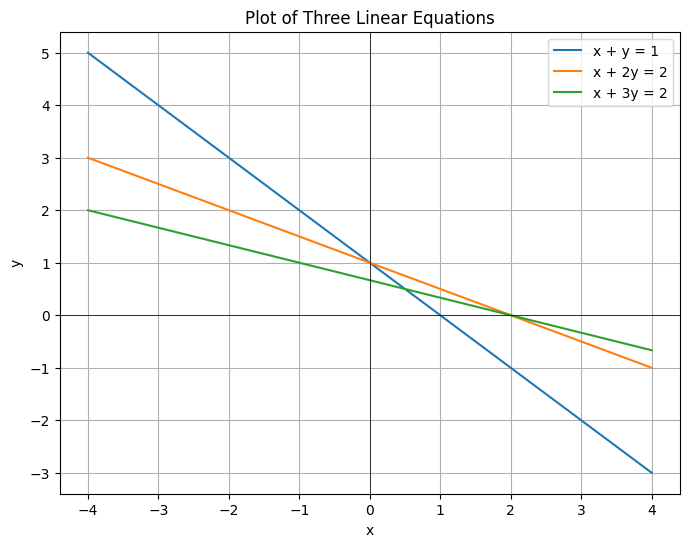

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define x range
x = np.linspace(-4, 4, 50)

# Define the equations
y1 = 1 - x       # x + y = 1
y2 = (2 - x) / 2 # x + 2y = 2
y3 = (2 - x) / 3 # x + 3y = 2

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='x + y = 1')
plt.plot(x, y2, label='x + 2y = 2')
plt.plot(x, y3, label='x + 3y = 2')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Three Linear Equations')
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Show plot
plt.show()

## 6. Summary Table
| Method             | Type         | Pros                     | Cons                      |
|--------------------|--------------|--------------------------|---------------------------|
| `np.linalg.solve`  | Direct       | Fast, accurate           | Only for square systems   |
| Inversion          | Direct       | Conceptually simple      | Numerically unstable      |
| Gauss Elimination  | Manual       | Educational               | Tedious for large systems |
| Gauss-Seidel       | Iterative    | Good for sparse systems  | Needs convergence check   |
| Least Squares      | Overdetermined | Handles extra equations | Approximate solution      |


## Exercise Problem 1: 
Solve this system of equations using least squares method and plot the three line in one plot.
1. \(2x + y = 8\)
2. \(x + 3y = 13\)
3. \(x + y = 7\) *(Overdetermined)*



In [16]:
# Your code here

## Exercise Problem 2
Create a $3\times 3$ system with a unique solution. Verify using rank and determinant, then solve with `solve`.

In [17]:
# Your code here


## Exercise Problem 3
Create an inconsistent system. Compute the least-squares solution and residual norm.

In [18]:
# Your code here

## Exercise Problem 4
Use `gaussian_elimination_solve` to solve a new square system and verify the result with `solve`.

In [19]:
# Your code here